In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("C:/Users/PC/Downloads/train.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
#df['day']=df.day.astype('object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [12]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [13]:
cat_columns=df.select_dtypes(exclude=['int']).columns

In [14]:
for column in cat_columns:
    cat_count=df[column].nunique()
    print(cat_count)    
print(cat_columns)

12
3
4
2
2
2
3
12
4
2
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [15]:
numerical_columns=df.select_dtypes(exclude=['object'])
numerical_columns.shape


(45211, 7)

In [16]:
numerical_columns.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [17]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [18]:
month_map={'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
       'mar':3, 'apr':4, 'sep':9}
df['month']=df['month'].map(month_map)

In [19]:
date=pd.to_datetime(df[['day','month']].assign(year=2018))

In [20]:
df.drop(['day','month','previous'],axis=1,inplace=True)

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,unknown,no


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  poutcome   45211 non-null  object
 13  y          45211 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [23]:
for column in numerical_columns.columns:
    Q1=numerical_columns[column].quantile(0.25)
    Q3=numerical_columns[column].quantile(0.75)
    IQR=Q3-Q1
    lowerbound=Q1-1.5*(IQR)
    upperbound=Q3+1.5*(IQR)
    numer_df=numerical_columns[(numerical_columns[column]>=lowerbound)& (numerical_columns[column]<=upperbound)]

print(numer_df)

       age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45203   23      113   17       266         1     -1         0
45205   25      505   17       386         2     -1         0
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45209   57      668   17       508         4     -1         0

[36954 rows x 7 columns]


In [24]:
df.drop(['age','balance','duration','campaign','pdays'],axis=1,inplace=True)
df=pd.concat([numer_df,df],axis=1)

In [25]:
df.isnull().sum()
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

age          0
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
poutcome     0
y            0
dtype: int64

In [27]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,poutcome,y
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,management,married,tertiary,no,yes,no,unknown,unknown,no
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,technician,single,secondary,no,yes,no,unknown,unknown,no
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,entrepreneur,married,secondary,no,yes,yes,unknown,unknown,no
3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0,blue-collar,married,unknown,no,yes,no,unknown,unknown,no
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0,unknown,single,unknown,no,no,no,unknown,unknown,no


<Axes: xlabel='contact'>

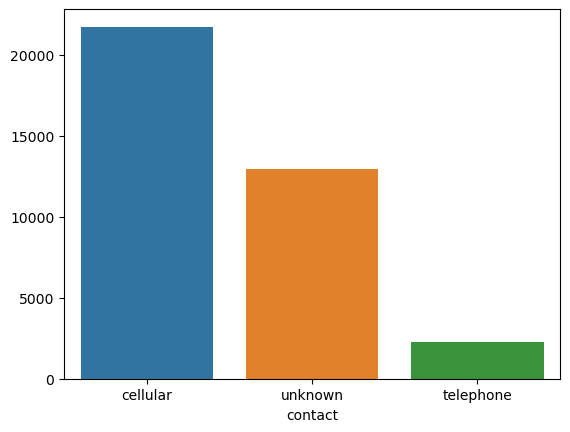

In [76]:
contact_counts=df['contact'].value_counts()
sns.barplot(x=contact_counts.index,y=contact_counts.values)

<Axes: xlabel='job'>

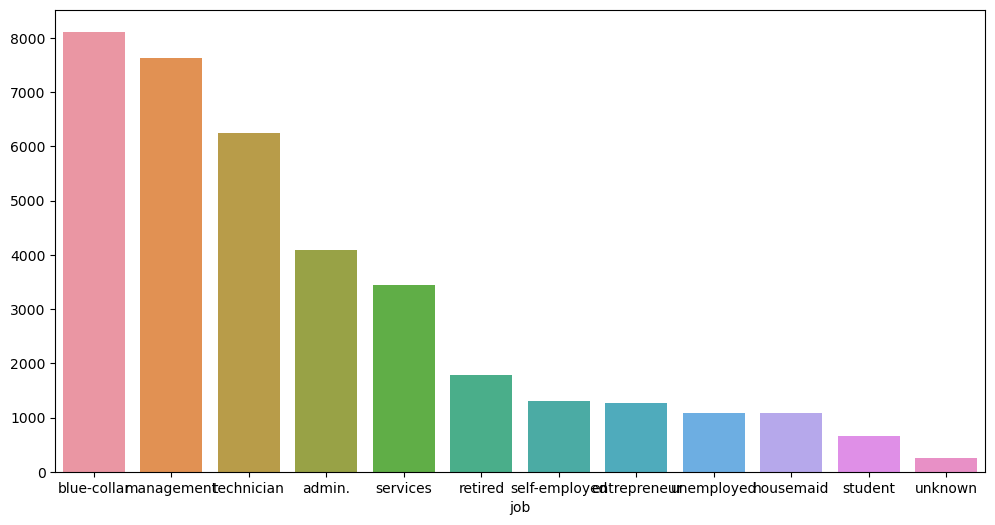

In [75]:
job_counts=df['job'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=job_counts.index,y=job_counts.values)

<Axes: xlabel='education'>

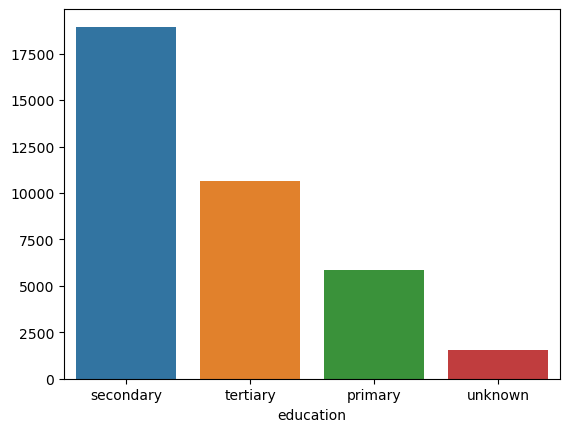

In [72]:
education_counts=df['education'].value_counts()
sns.barplot(x=education_counts.index,y=education_counts.values)

<Axes: xlabel='marital'>

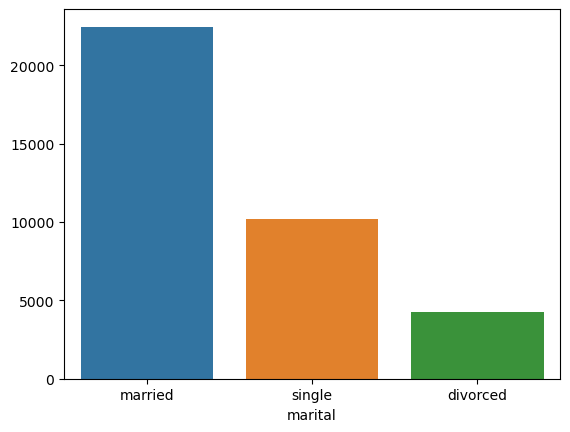

In [70]:
marital_counts=df['marital'].value_counts()
sns.barplot(x=marital_counts.index,y=marital_counts.values)

In [28]:
data=df
data.shape


(36954, 16)

In [29]:
df['y'].value_counts()

y
no     33570
yes     3384
Name: count, dtype: int64

In [30]:
y=df['y']
y

0         no
1         no
2         no
3         no
4         no
        ... 
45203    yes
45205    yes
45206    yes
45207    yes
45209     no
Name: y, Length: 36954, dtype: object

In [31]:
y=np.where(y=='no',0,y)
y=np.where(y=="yes",1,y)
y

array([0, 0, 0, ..., 1, 1, 0], dtype=object)

In [32]:
data.drop(['y'],axis=1,inplace=True)

In [33]:
data.dropna(axis=0,inplace=True)

In [34]:
data=pd.get_dummies(data)
#data=data.astype(int)

In [35]:
data

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,False,False,False,...,True,False,False,True,True,False,False,False,True,True
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,False,False,False,...,True,False,False,True,True,False,False,False,True,True
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,False,False,True,...,True,False,False,True,False,True,False,False,True,True
3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0,False,True,False,...,True,False,False,True,True,False,False,False,True,True
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0,False,False,False,...,True,False,True,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23.0,113.0,17.0,266.0,1.0,-1.0,0.0,False,False,False,...,True,False,True,False,True,False,True,False,False,True
45205,25.0,505.0,17.0,386.0,2.0,-1.0,0.0,False,False,False,...,True,False,True,False,False,True,True,False,False,True
45206,51.0,825.0,17.0,977.0,3.0,-1.0,0.0,False,False,False,...,True,False,True,False,True,False,True,False,False,True
45207,71.0,1729.0,17.0,456.0,2.0,-1.0,0.0,False,False,False,...,True,False,True,False,True,False,True,False,False,True


In [36]:
data['day']=date

In [37]:
data

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown
0,58.0,2143.0,2018-05-05,261.0,1.0,-1.0,0.0,False,False,False,...,True,False,False,True,True,False,False,False,True,True
1,44.0,29.0,2018-05-05,151.0,1.0,-1.0,0.0,False,False,False,...,True,False,False,True,True,False,False,False,True,True
2,33.0,2.0,2018-05-05,76.0,1.0,-1.0,0.0,False,False,True,...,True,False,False,True,False,True,False,False,True,True
3,47.0,1506.0,2018-05-05,92.0,1.0,-1.0,0.0,False,True,False,...,True,False,False,True,True,False,False,False,True,True
4,33.0,1.0,2018-05-05,198.0,1.0,-1.0,0.0,False,False,False,...,True,False,True,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23.0,113.0,2018-11-17,266.0,1.0,-1.0,0.0,False,False,False,...,True,False,True,False,True,False,True,False,False,True
45205,25.0,505.0,2018-11-17,386.0,2.0,-1.0,0.0,False,False,False,...,True,False,True,False,False,True,True,False,False,True
45206,51.0,825.0,2018-11-17,977.0,3.0,-1.0,0.0,False,False,False,...,True,False,True,False,True,False,True,False,False,True
45207,71.0,1729.0,2018-11-17,456.0,2.0,-1.0,0.0,False,False,False,...,True,False,True,False,True,False,True,False,False,True


In [38]:
data['day'].shape

(36954,)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36954 entries, 0 to 45209
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   age                  36954 non-null  float64       
 1   balance              36954 non-null  float64       
 2   day                  36954 non-null  datetime64[ns]
 3   duration             36954 non-null  float64       
 4   campaign             36954 non-null  float64       
 5   pdays                36954 non-null  float64       
 6   previous             36954 non-null  float64       
 7   job_admin.           36954 non-null  bool          
 8   job_blue-collar      36954 non-null  bool          
 9   job_entrepreneur     36954 non-null  bool          
 10  job_housemaid        36954 non-null  bool          
 11  job_management       36954 non-null  bool          
 12  job_retired          36954 non-null  bool          
 13  job_self-employed    36954 non-null 

In [40]:
data.describe

<bound method NDFrame.describe of         age  balance        day  duration  campaign  pdays  previous  \
0      58.0   2143.0 2018-05-05     261.0       1.0   -1.0       0.0   
1      44.0     29.0 2018-05-05     151.0       1.0   -1.0       0.0   
2      33.0      2.0 2018-05-05      76.0       1.0   -1.0       0.0   
3      47.0   1506.0 2018-05-05      92.0       1.0   -1.0       0.0   
4      33.0      1.0 2018-05-05     198.0       1.0   -1.0       0.0   
...     ...      ...        ...       ...       ...    ...       ...   
45203  23.0    113.0 2018-11-17     266.0       1.0   -1.0       0.0   
45205  25.0    505.0 2018-11-17     386.0       2.0   -1.0       0.0   
45206  51.0    825.0 2018-11-17     977.0       3.0   -1.0       0.0   
45207  71.0   1729.0 2018-11-17     456.0       2.0   -1.0       0.0   
45209  57.0    668.0 2018-11-17     508.0       4.0   -1.0       0.0   

       job_admin.  job_blue-collar  job_entrepreneur  ...  default_no  \
0           False           

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36954 entries, 0 to 45209
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   age                  36954 non-null  float64       
 1   balance              36954 non-null  float64       
 2   day                  36954 non-null  datetime64[ns]
 3   duration             36954 non-null  float64       
 4   campaign             36954 non-null  float64       
 5   pdays                36954 non-null  float64       
 6   previous             36954 non-null  float64       
 7   job_admin.           36954 non-null  bool          
 8   job_blue-collar      36954 non-null  bool          
 9   job_entrepreneur     36954 non-null  bool          
 10  job_housemaid        36954 non-null  bool          
 11  job_management       36954 non-null  bool          
 12  job_retired          36954 non-null  bool          
 13  job_self-employed    36954 non-null 

In [42]:
x=data.drop(['day'],axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36954 entries, 0 to 45209
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  36954 non-null  float64
 1   balance              36954 non-null  float64
 2   duration             36954 non-null  float64
 3   campaign             36954 non-null  float64
 4   pdays                36954 non-null  float64
 5   previous             36954 non-null  float64
 6   job_admin.           36954 non-null  bool   
 7   job_blue-collar      36954 non-null  bool   
 8   job_entrepreneur     36954 non-null  bool   
 9   job_housemaid        36954 non-null  bool   
 10  job_management       36954 non-null  bool   
 11  job_retired          36954 non-null  bool   
 12  job_self-employed    36954 non-null  bool   
 13  job_services         36954 non-null  bool   
 14  job_student          36954 non-null  bool   
 15  job_technician       36954 non-null  bool

In [43]:
y=y.astype(str)

In [44]:
y.dtype

dtype('<U1')

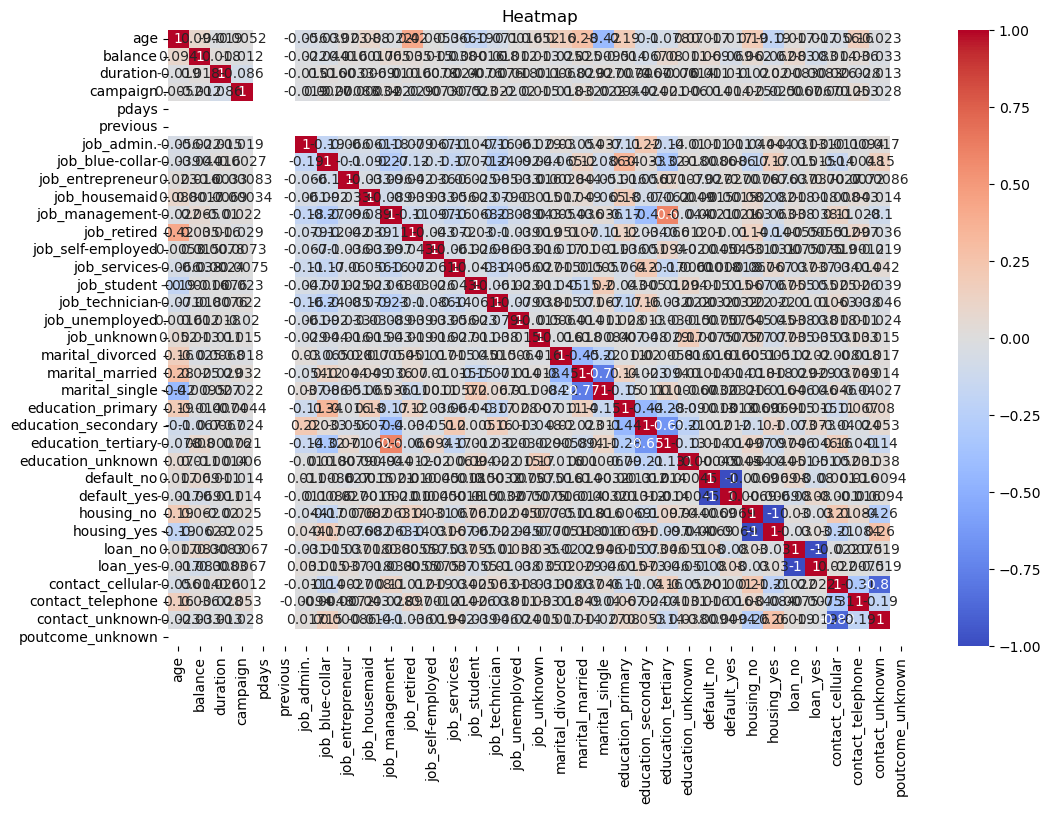

In [45]:

corr_matrix=x.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Heatmap")
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True)


In [48]:
X_train=X_train.astype(int)


In [49]:
np.unique(Y_train)


array(['0', '1'], dtype='<U1')

In [50]:
y=pd.DataFrame(y)

In [51]:
y.value_counts().astype(str)

0    33570
1     3384
Name: count, dtype: object

In [52]:
X_train

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 2, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 6, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf=LogisticRegression().fit(X_train,Y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
print(accuracy)

0.9098904072520633


In [61]:
test=pd.read_csv('C:/Users/PC/Downloads/test.csv')

In [62]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [63]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [64]:
test.shape

(4521, 17)

In [65]:
test['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64